# Importações

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.neighbors import NearestNeighbors
from functools import partial


Métodos de Clusterização

In [78]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, MeanShift

# Funções

In [79]:
def funcDataFrame(info, df_clusters):
    nova_linha_df = pd.DataFrame([info], columns=df_clusters.columns)

    df_clusters = pd.concat([df_clusters, nova_linha_df], ignore_index=True)
    
    return df_clusters

# DataFrame

In [80]:
df_original = pd.read_excel('../dados/df.xlsx',)
df = df_original.copy()
df

,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt
0,0,1,0,0,77.11,1.52
1,0,2,1,0,58.06,1.60
2,0,5,0,0,122.47,1.57
3,5,4,0,0,95.25,1.75
4,2,3,3,1,99.79,1.80
...,...,...,...,...,...,...
10552,5,3,0,0,67.59,1.57
10553,2,2,3,2,81.65,1.73
10554,2,1,4,0,64.41,1.70
10555,1,1,3,1,76.20,1.80


In [81]:
scaler = StandardScaler()

scaler.fit(df)

df =scaler.transform(df)

In [82]:
df

array([[-0.90243623, -1.41570079, -0.73512798, -0.56796229, -0.14168606,
        -1.65475178],
       [-0.90243623, -0.47543321, -0.27229723, -0.56796229, -1.09188978,
        -0.89374834],
       [-0.90243623,  2.34536954, -0.73512798, -0.56796229,  2.12084625,
        -1.17912463],
       ...,
       [-0.22174037, -1.41570079,  1.11619504, -0.56796229, -0.77515521,
         0.05750597],
       [-0.5620883 , -1.41570079,  0.65336429,  0.72399589, -0.18707637,
         1.00876027],
       [ 0.11860756, -1.41570079, -0.73512798, -0.56796229, -0.82054552,
        -0.13274489]])

## Métrica

In [83]:
from sklearn.metrics import make_scorer, silhouette_score,calinski_harabasz_score,davies_bouldin_score


In [84]:
def score_composto(X, labels):
    # Coeficiente de Silhueta normalizado
    sil_score = silhouette_score(X, labels)
    sil_score_norm = (sil_score + 1) / 2

    # Índice de Davies-Bouldin normalizado (inverso)
    db_score = davies_bouldin_score(X, labels)
    db_score_norm = 1 / (1 + db_score)

    # Índice de Calinski-Harabasz normalizado (log transformado)
    ch_score = calinski_harabasz_score(X, labels)
    ch_score_log = np.log(1 + ch_score)
    ch_score_norm = ch_score_log / (1 + ch_score_log)

    # Cálculo do score composto
    score_composto = (sil_score_norm + db_score_norm + ch_score_norm) / 3

    return score_composto


## Clusterizações

### Variações dos Hiperparâmetros

#### Número de Clusters (AgglomerativeClustering e KMeans)

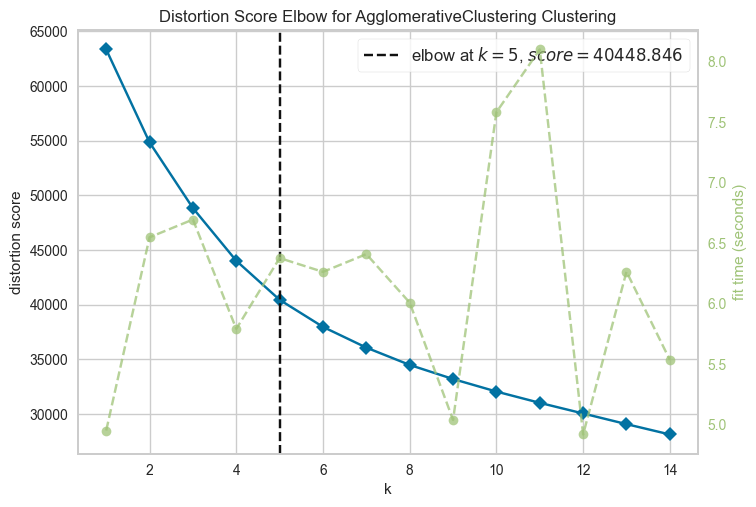

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
#distorção: média das distâncias quadradas dos centros dos clusters dos respectivos clusters
grafico = KElbowVisualizer(AgglomerativeClustering(), k=(1,15))

grafico.fit(df)        
grafico.show()

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arthurdomingos-ieg\AppData\Local\Prog

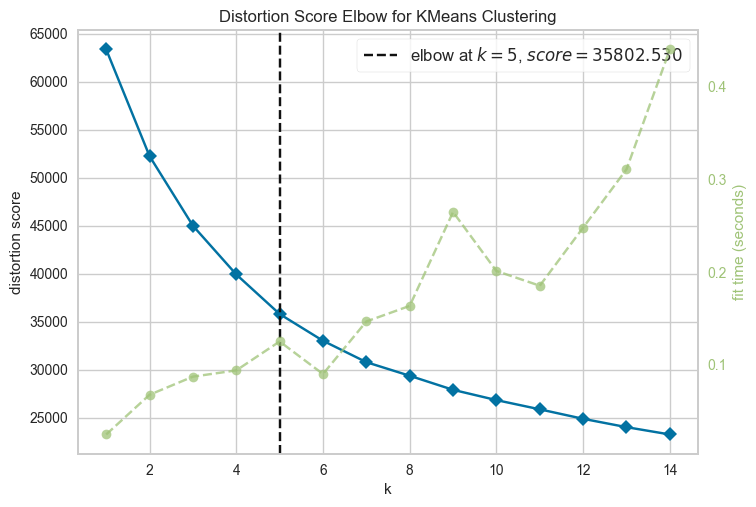

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
#distorção: média das distâncias quadradas dos centros dos clusters dos respectivos clusters
grafico = KElbowVisualizer(KMeans(), k=(1,15))

grafico.fit(df)        
grafico.show()  

Vou considerar até 7 clusters nos dois algorítmos

#### Escolha do eps (DBSCAN)

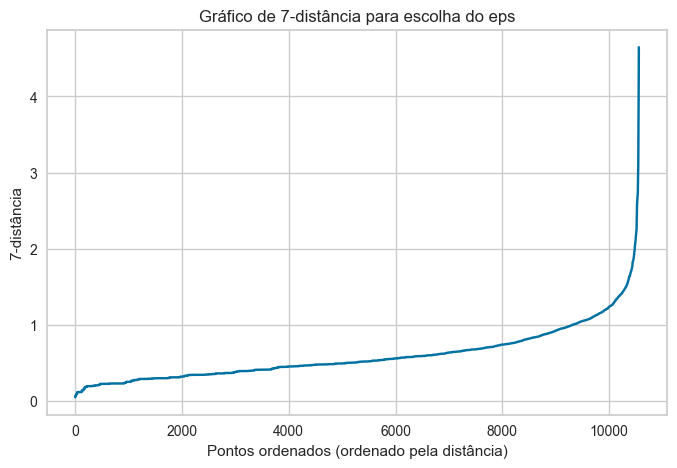

In [121]:
k = 7

# Calcular as k distâncias mais próximas
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

# Ordenar as distâncias para plotar o gráfico de k-distância
distances = np.sort(distances[:, k - 1], axis=0)

# Plotar o gráfico de k-distância
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Pontos ordenados (ordenado pela distância)")
plt.ylabel(f"{k}-distância")
plt.title(f"Gráfico de {k}-distância para escolha do eps")
plt.grid(True)
plt.show()

Cerca de 2 a 5 para eps

#### Encontrar Valores Próximos do bandwidth (mean-shift)

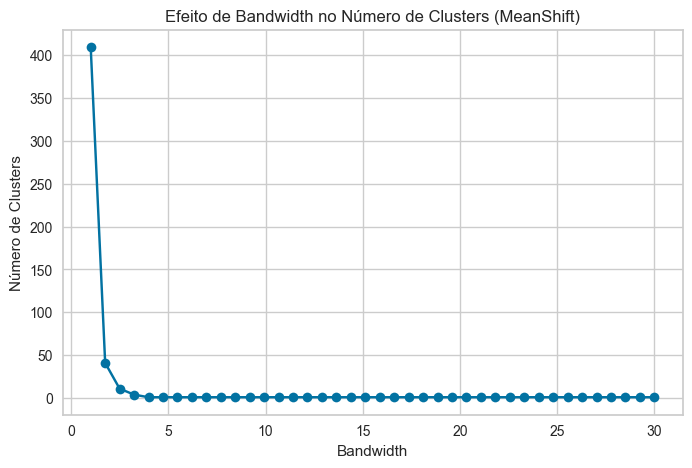

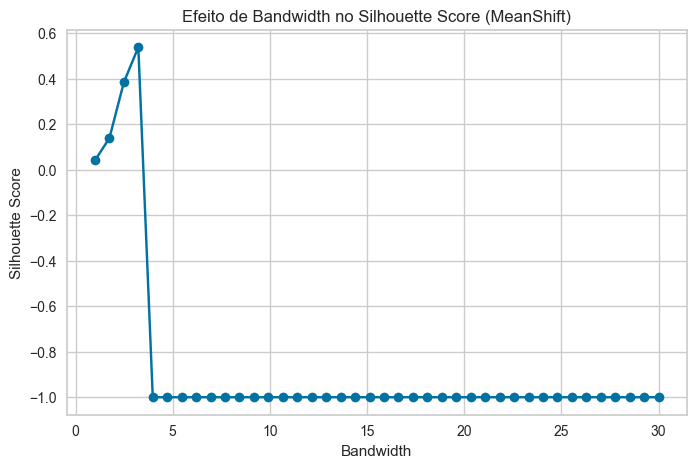

In [88]:
bandwidth_values = np.linspace(1, 30, 40)
n_clusters_list = []
silhouette_scores = []

for bandwidth in bandwidth_values:
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    labels = meanshift.fit_predict(df)
    n_clusters = len(np.unique(labels))
    n_clusters_list.append(n_clusters)
    if n_clusters > 1:
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

plt.figure(figsize=(8, 5))
plt.plot(bandwidth_values, n_clusters_list, marker='o')
plt.xlabel('Bandwidth')
plt.ylabel('Número de Clusters')
plt.title('Efeito de Bandwidth no Número de Clusters (MeanShift)')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(bandwidth_values, silhouette_scores, marker='o')
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Score')
plt.title('Efeito de Bandwidth no Silhouette Score (MeanShift)')
plt.show()

Valores após 10 até 20

In [123]:
def objective(trial, X, clustering_algorithm):

    if clustering_algorithm == 'kmeans':
        n_clusters = trial.suggest_int('n_clusters', 3, 7)
        init = trial.suggest_categorical('init', ['k-means++', 'random'])
        n_init = trial.suggest_int('n_init', 10, 300, step=10)
        max_iter = trial.suggest_int('max_iter', 300, 1200, step=50)
        tol = trial.suggest_float('tol', 1e-6, 1e-1, log=True)
        algorithm = trial.suggest_categorical('algorithm', ['lloyd', 'elkan'])
        model = KMeans(
            n_clusters=n_clusters,
            init=init,
            n_init=n_init,
            max_iter=max_iter,
            tol=tol,
            algorithm=algorithm,
            random_state=42
        )

    elif clustering_algorithm == 'dbscan':
        eps = trial.suggest_float('eps', 0.5, 5, step=0.5)
        min_samples = trial.suggest_int('min_samples', 1500,3000 ,step=100)
        metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'chebyshev', 'minkowski'])
        algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
        leaf_size = trial.suggest_int('leaf_size', 10, 100, step=10)
        p = trial.suggest_float('p', 1.0, 5.0)
        model = DBSCAN(
            eps=eps,
            min_samples=min_samples,
            metric=metric,
            algorithm=algorithm,
            leaf_size=leaf_size,
            p=p
        )

    elif clustering_algorithm == 'agglomerative':

        n_clusters = trial.suggest_int('n_clusters', 4, 7)
        compute_full_tree = trial.suggest_categorical('compute_full_tree', ['auto', True, False])

        linkage = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])
        if linkage == 'ward':
            metric = 'euclidean'
        else:
            metric = trial.suggest_categorical('metric', ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'])
        
        model = AgglomerativeClustering(
            n_clusters=n_clusters,
            linkage=linkage,
            affinity=metric,
            compute_full_tree=compute_full_tree,
        )



    elif clustering_algorithm == 'mean_shift':
        bandwidth = trial.suggest_float('bandwidth', 1, 10.0, step=1.0)
        bin_seeding = trial.suggest_categorical('bin_seeding', [True, False])
        min_bin_freq = trial.suggest_int('min_bin_freq', 200, 700, step=50)
        cluster_all = trial.suggest_categorical('cluster_all', [True, False])
        model = MeanShift(
            bandwidth=bandwidth,
            bin_seeding=bin_seeding,
            min_bin_freq=min_bin_freq,
            cluster_all=cluster_all
        )

    else:
        raise ValueError("Algoritmo de clusterização não suportado.")


    # Ajustar o modelo e prever as labels
    labels = model.fit_predict(X)

    # Verificar se todos os pontos foram classificados no mesmo cluster
    if len(np.unique(labels)) <= 1:
        return -np.inf  # Retorna um valor muito baixo se a clusterização não for válida

    # Calcular o score composto
    score = score_composto(X, labels)

    return score


In [90]:
def otimizar_clustering(X, clustering_algorithm, n_trials=50):
    study = optuna.create_study(direction='maximize')

    # Definir a função objetivo parcial com o algoritmo de clusterização fixado

    objective_func = partial(objective, X=X, clustering_algorithm=clustering_algorithm)
    
    # Executar a otimização
    study.optimize(objective_func, n_trials=n_trials)

    # Melhor conjunto de hiperparâmetros
    best_params = study.best_params
    best_score = study.best_value

    print(f"\nMelhores hiperparâmetros para {clustering_algorithm}:")
    print(best_params)
    print(f"Melhor score composto: {best_score}")

    return study

In [91]:
print("Otimização do K-Means:")
study_kmeans = otimizar_clustering(df, 'kmeans', n_trials=50)


[I 2024-10-30 09:26:49,753] A new study created in memory with name: no-name-168d3025-432e-4918-8d7c-03b0aa0b614a


Otimização do K-Means:


[I 2024-10-30 09:26:52,372] Trial 0 finished with value: 0.617710000064733 and parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 30, 'max_iter': 800, 'tol': 1.8680185563915028e-06, 'algorithm': 'lloyd'}. Best is trial 0 with value: 0.617710000064733.
[I 2024-10-30 09:26:58,467] Trial 1 finished with value: 0.617710000064733 and parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 210, 'max_iter': 150, 'tol': 0.0002768016893991008, 'algorithm': 'elkan'}. Best is trial 0 with value: 0.617710000064733.
[I 2024-10-30 09:27:10,161] Trial 2 finished with value: 0.6212904883927516 and parameters: {'n_clusters': 4, 'init': 'random', 'n_init': 210, 'max_iter': 200, 'tol': 6.542952639729098e-06, 'algorithm': 'elkan'}. Best is trial 2 with value: 0.6212904883927516.
[I 2024-10-30 09:27:12,958] Trial 3 finished with value: 0.6177104508545299 and parameters: {'n_clusters': 3, 'init': 'random', 'n_init': 180, 'max_iter': 250, 'tol': 0.06765909098720269, 'algorithm': 'lloyd'}. Best


Melhores hiperparâmetros para kmeans:
{'n_clusters': 5, 'init': 'random', 'n_init': 70, 'max_iter': 700, 'tol': 0.002215236574508086, 'algorithm': 'elkan'}
Melhor score composto: 0.6296977126814983


In [124]:
print("\nOtimização do DBSCAN:")
study_dbscan = otimizar_clustering(df, 'dbscan', n_trials=15)


[I 2024-10-30 11:10:25,301] A new study created in memory with name: no-name-62d4da50-4cdc-4374-ab98-ca4146af4e6e



Otimização do DBSCAN:


[I 2024-10-30 11:10:27,807] Trial 0 finished with value: -inf and parameters: {'eps': 2.0, 'min_samples': 2000, 'metric': 'manhattan', 'algorithm': 'kd_tree', 'leaf_size': 10, 'p': 3.0091497009328303}. Best is trial 0 with value: -inf.
[I 2024-10-30 11:10:35,262] Trial 1 finished with value: 0.6118928495325076 and parameters: {'eps': 2.0, 'min_samples': 1600, 'metric': 'euclidean', 'algorithm': 'kd_tree', 'leaf_size': 100, 'p': 3.75804352609538}. Best is trial 1 with value: 0.6118928495325076.
[I 2024-10-30 11:10:43,050] Trial 2 finished with value: 0.8059539619112345 and parameters: {'eps': 5.0, 'min_samples': 2000, 'metric': 'chebyshev', 'algorithm': 'kd_tree', 'leaf_size': 100, 'p': 3.9640615388293425}. Best is trial 2 with value: 0.8059539619112345.
[I 2024-10-30 11:10:50,154] Trial 3 finished with value: 0.6966731077551694 and parameters: {'eps': 4.0, 'min_samples': 1700, 'metric': 'euclidean', 'algorithm': 'kd_tree', 'leaf_size': 100, 'p': 3.8754122516694474}. Best is trial 2 wit


Melhores hiperparâmetros para dbscan:
{'eps': 5.0, 'min_samples': 2000, 'metric': 'chebyshev', 'algorithm': 'kd_tree', 'leaf_size': 100, 'p': 3.9640615388293425}
Melhor score composto: 0.8059539619112345


In [125]:
print("\nOtimização do Agglomerative Clustering:")
study_agglomerative = otimizar_clustering(df, 'agglomerative', n_trials=15)


[I 2024-10-30 11:12:06,117] A new study created in memory with name: no-name-6e58d1cb-0f54-4289-8568-fd9c8ed98e1d


c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead




Otimização do Agglomerative Clustering:


[I 2024-10-30 11:12:12,186] Trial 0 finished with value: 0.7815403625614881 and parameters: {'n_clusters': 4, 'compute_full_tree': False, 'linkage': 'single', 'metric': 'l1'}. Best is trial 0 with value: 0.7815403625614881.
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

[I 2024-10-30 11:12:21,644] Trial 1 finished with value: 0.6013772326803929 and parameters: {'n_clusters': 7, 'compute_full_tree': True, 'linkage': 'ward'}. Best is trial 0 with value: 0.7815403625614881.
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

[I 2024-10-30 11:12:26,497] Trial 2 finished with value: 0.7619037146878852 and param


Melhores hiperparâmetros para agglomerative:
{'n_clusters': 4, 'compute_full_tree': False, 'linkage': 'single', 'metric': 'l1'}
Melhor score composto: 0.7815403625614881


In [126]:
print("\nOtimização do Mean-Shift:")
study_meanshift = otimizar_clustering(df, 'mean_shift', n_trials=5)


[I 2024-10-30 11:13:57,237] A new study created in memory with name: no-name-1978a97a-04b9-43ba-8d09-0c640afca525



Otimização do Mean-Shift:


[I 2024-10-30 11:14:37,563] Trial 0 finished with value: -inf and parameters: {'bandwidth': 6.0, 'bin_seeding': False, 'min_bin_freq': 500, 'cluster_all': True}. Best is trial 0 with value: -inf.
[I 2024-10-30 11:15:07,172] Trial 1 finished with value: 0.6917663316115853 and parameters: {'bandwidth': 9.0, 'bin_seeding': False, 'min_bin_freq': 200, 'cluster_all': False}. Best is trial 1 with value: 0.6917663316115853.
[I 2024-10-30 11:15:07,326] Trial 2 finished with value: -inf and parameters: {'bandwidth': 7.0, 'bin_seeding': True, 'min_bin_freq': 500, 'cluster_all': True}. Best is trial 1 with value: 0.6917663316115853.
[I 2024-10-30 11:15:10,761] Trial 3 finished with value: 0.5839606324777838 and parameters: {'bandwidth': 3.0, 'bin_seeding': True, 'min_bin_freq': 700, 'cluster_all': False}. Best is trial 1 with value: 0.6917663316115853.
[I 2024-10-30 11:15:10,946] Trial 4 finished with value: -inf and parameters: {'bandwidth': 8.0, 'bin_seeding': True, 'min_bin_freq': 500, 'cluste


Melhores hiperparâmetros para mean_shift:
{'bandwidth': 9.0, 'bin_seeding': False, 'min_bin_freq': 200, 'cluster_all': False}
Melhor score composto: 0.6917663316115853


## Classificação

### K-Means

In [127]:
kmeans = KMeans(**study_kmeans.best_params).fit(df)
labels = kmeans.labels_
labels

array([1, 4, 4, ..., 1, 0, 1])

In [128]:
df = pd.DataFrame(df, columns=df_original.columns)
df

,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt
0,-0.902436,-1.415701,-0.735128,-0.567962,-0.141686,-1.654752
1,-0.902436,-0.475433,-0.272297,-0.567962,-1.091890,-0.893748
2,-0.902436,2.345370,-0.735128,-0.567962,2.120846,-1.179125
3,0.799303,1.405102,-0.735128,-0.567962,0.763127,0.533133
4,-0.221740,0.464834,0.653364,0.723996,0.989580,1.008760
...,...,...,...,...,...,...
10552,0.799303,0.464834,-0.735128,-0.567962,-0.616539,-1.179125
10553,-0.221740,-0.475433,0.653364,2.015954,0.084767,0.342882
10554,-0.221740,-1.415701,1.116195,-0.567962,-0.775155,0.057506
10555,-0.562088,-1.415701,0.653364,0.723996,-0.187076,1.008760


In [129]:
df_kmeans = df.copy()
df_kmeans['Clusters'] = labels
df_kmeans

,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,-0.902436,-1.415701,-0.735128,-0.567962,-0.141686,-1.654752,1
1,-0.902436,-0.475433,-0.272297,-0.567962,-1.091890,-0.893748,4
2,-0.902436,2.345370,-0.735128,-0.567962,2.120846,-1.179125,4
3,0.799303,1.405102,-0.735128,-0.567962,0.763127,0.533133,2
4,-0.221740,0.464834,0.653364,0.723996,0.989580,1.008760,2
...,...,...,...,...,...,...,...
10552,0.799303,0.464834,-0.735128,-0.567962,-0.616539,-1.179125,4
10553,-0.221740,-0.475433,0.653364,2.015954,0.084767,0.342882,0
10554,-0.221740,-1.415701,1.116195,-0.567962,-0.775155,0.057506,1
10555,-0.562088,-1.415701,0.653364,0.723996,-0.187076,1.008760,0


In [130]:
optuna.visualization.plot_optimization_history(study_kmeans)

### DBSCAN

In [131]:
dbscan = DBSCAN(**study_dbscan.best_params).fit(df)
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [132]:
df_dbscan = df.copy()
df_dbscan['Clusters'] = labels
df_dbscan

,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,-0.902436,-1.415701,-0.735128,-0.567962,-0.141686,-1.654752,0
1,-0.902436,-0.475433,-0.272297,-0.567962,-1.091890,-0.893748,0
2,-0.902436,2.345370,-0.735128,-0.567962,2.120846,-1.179125,0
3,0.799303,1.405102,-0.735128,-0.567962,0.763127,0.533133,0
4,-0.221740,0.464834,0.653364,0.723996,0.989580,1.008760,0
...,...,...,...,...,...,...,...
10552,0.799303,0.464834,-0.735128,-0.567962,-0.616539,-1.179125,0
10553,-0.221740,-0.475433,0.653364,2.015954,0.084767,0.342882,0
10554,-0.221740,-1.415701,1.116195,-0.567962,-0.775155,0.057506,0
10555,-0.562088,-1.415701,0.653364,0.723996,-0.187076,1.008760,0


In [133]:
df_dbscan['Clusters'].value_counts()

 0    10554
-1        3
Name: Clusters, dtype: int64

In [134]:
optuna.visualization.plot_optimization_history(study_dbscan)

In [135]:
optuna.visualization.plot_param_importances(study_dbscan)

[W 2024-10-30 11:15:15,606] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-10-30 11:15:15,608] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-10-30 11:15:15,609] Trial 10 is omitted in visualization because its objective value is inf or nan.


In [136]:
optuna.visualization.plot_slice(study_dbscan)

[W 2024-10-30 11:15:16,060] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-10-30 11:15:16,063] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-10-30 11:15:16,064] Trial 10 is omitted in visualization because its objective value is inf or nan.


### Agglomerative Clustering

In [137]:
b = study_agglomerative.best_params
b['n_clusters'] = None
b

{'n_clusters': None,
 'compute_full_tree': False,
 'linkage': 'single',
 'metric': 'l1'}

In [138]:
agglomerative = AgglomerativeClustering(**study_agglomerative.best_params).fit(df)
labels = agglomerative.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
df_agglomerative = df.copy()
df_agglomerative['Clusters'] = labels
df_agglomerative

,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,-0.902436,-1.415701,-0.735128,-0.567962,-0.141686,-1.654752,0
1,-0.902436,-0.475433,-0.272297,-0.567962,-1.091890,-0.893748,0
2,-0.902436,2.345370,-0.735128,-0.567962,2.120846,-1.179125,0
3,0.799303,1.405102,-0.735128,-0.567962,0.763127,0.533133,0
4,-0.221740,0.464834,0.653364,0.723996,0.989580,1.008760,0
...,...,...,...,...,...,...,...
10552,0.799303,0.464834,-0.735128,-0.567962,-0.616539,-1.179125,0
10553,-0.221740,-0.475433,0.653364,2.015954,0.084767,0.342882,0
10554,-0.221740,-1.415701,1.116195,-0.567962,-0.775155,0.057506,0
10555,-0.562088,-1.415701,0.653364,0.723996,-0.187076,1.008760,0


In [140]:
optuna.visualization.plot_optimization_history(study_agglomerative)

In [141]:
optuna.visualization.plot_param_importances(study_agglomerative)

In [142]:
optuna.visualization.plot_slice(study_agglomerative)

### Mean-Shift

In [143]:
meanshift = MeanShift(**study_meanshift.best_params).fit(df)
labels = meanshift.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [144]:
df_meanshift = df.copy()
df_meanshift['Clusters'] = labels
df_meanshift

,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,-0.902436,-1.415701,-0.735128,-0.567962,-0.141686,-1.654752,0
1,-0.902436,-0.475433,-0.272297,-0.567962,-1.091890,-0.893748,0
2,-0.902436,2.345370,-0.735128,-0.567962,2.120846,-1.179125,0
3,0.799303,1.405102,-0.735128,-0.567962,0.763127,0.533133,0
4,-0.221740,0.464834,0.653364,0.723996,0.989580,1.008760,0
...,...,...,...,...,...,...,...
10552,0.799303,0.464834,-0.735128,-0.567962,-0.616539,-1.179125,0
10553,-0.221740,-0.475433,0.653364,2.015954,0.084767,0.342882,0
10554,-0.221740,-1.415701,1.116195,-0.567962,-0.775155,0.057506,0
10555,-0.562088,-1.415701,0.653364,0.723996,-0.187076,1.008760,0


In [145]:
optuna.visualization.plot_optimization_history(study_meanshift)

In [146]:
optuna.visualization.plot_param_importances(study_meanshift)

[W 2024-10-30 11:15:41,482] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-10-30 11:15:41,485] Trial 2 is omitted in visualization because its objective value is inf or nan.
[W 2024-10-30 11:15:41,487] Trial 4 is omitted in visualization because its objective value is inf or nan.


In [147]:
optuna.visualization.plot_slice(study_meanshift)

[W 2024-10-30 11:15:41,712] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-10-30 11:15:41,714] Trial 2 is omitted in visualization because its objective value is inf or nan.
[W 2024-10-30 11:15:41,717] Trial 4 is omitted in visualization because its objective value is inf or nan.


### Exportações das Bases com Clusters

In [148]:
df_kmeans.to_excel('..\dados\df_normalizado_kmeans.xlsx', index=False)
df_dbscan.to_excel('..\dados\df_normalizado_dbscan.xlsx', index=False)
df_agglomerative.to_excel('..\dados\df_normalizado_agglomerative.xlsx', index=False)
df_meanshift.to_excel('..\dados\df_normalizado_meanshift.xlsx', index=False)
